This is the all-in-one draft notebook for the cloud eng final project. 

### Env

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

### Load Data

In [5]:
# TripAdvisor hotel review dataset
url = r'https://raw.githubusercontent.com/wenchengking/Cloud_Engineering_DS/main/tripadvisor_hotel_reviews.csv'
df = pd.read_csv(url, sep=',')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Data Cleaning and Processing

1. bundle ratings to satisfied (3/4/5) vs. unsatisfied (1/2)  
2. transform the texts using TF-IDF

In [6]:
# convert rating to 0/1
df['Rating'] = df['Rating'].apply(lambda x: 1 if x >= 3 else 0)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,1
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


In [15]:
# downsampling to balance the dataset
df = df.sample(frac=1)
df = pd.concat([df[df['Rating'] == 1][:1000], df[df['Rating'] == 0][:1000]])

In [16]:
df.Rating.value_counts()

1    1000
0    1000
Name: Rating, dtype: int64

In [18]:
# train/test split
X, y = df['Review'], df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# TF-IDF
print("TFIDF Vectorizer……")
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [23]:
type(tf_x_train)

scipy.sparse._csr.csr_matrix

### Model Building and Training

In [39]:
# Naive Bayes
print("Naive Bayes……")
# clf = MultinomialNB()
clf = LogisticRegression()
clf.fit(tf_x_train, y_train)

Naive Bayes……


LogisticRegression()

Text(113.9222222222222, 0.5, 'predicted label')

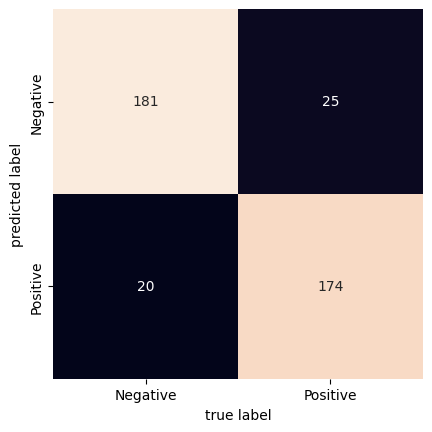

In [40]:
mat = confusion_matrix(y_test, clf.predict(tf_x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [43]:
# precision and recall
print("Precision: ", precision_score(y_test, clf.predict(tf_x_test)))
print("Recall: ", recall_score(y_test, clf.predict(tf_x_test)))

Precision:  0.8969072164948454
Recall:  0.8743718592964824
